In [39]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import TwistedBilayerGraphene as t
reload(t)
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigsh
from IPython.display import display, clear_output
from scipy.signal import argrelextrema

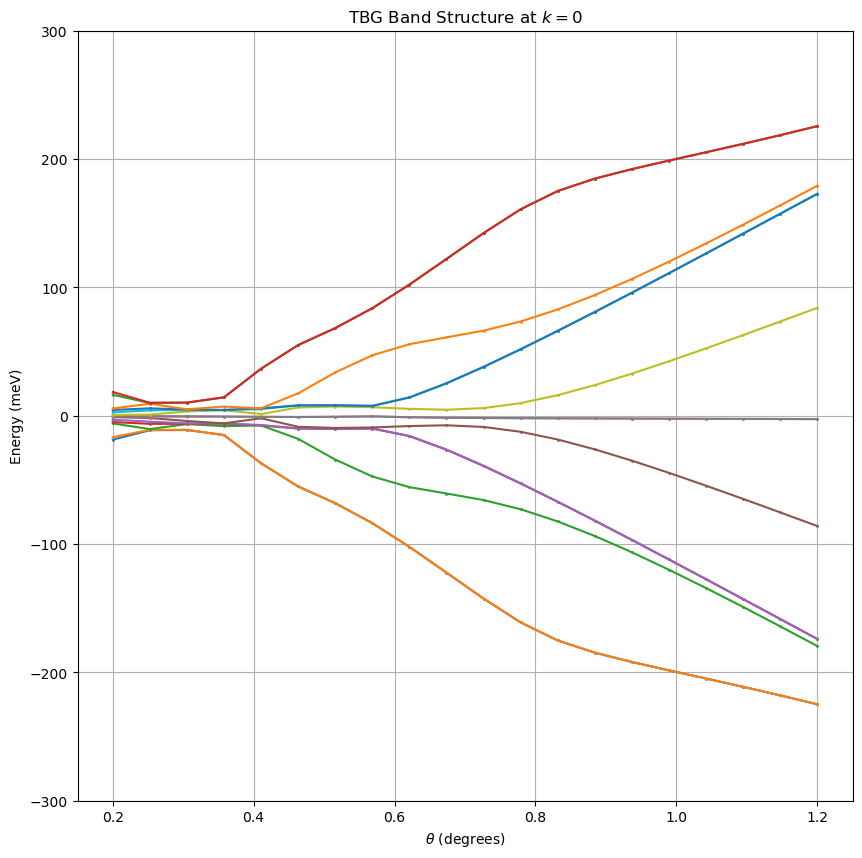

In [6]:
theta_deg_arr = np.linspace(0.2, 1.2, 20)
num_eigvalues = 14
spectrum = np.zeros((len(theta_deg_arr), num_eigvalues))

for i in range(len(theta_deg_arr)):
    theta_deg = theta_deg_arr[i]
    theta_rad = theta_deg/180 * np.pi
    tbg = t.BM_original(theta_rad, k_cutoff=8)
    H = tbg.Hamiltonian((0,0))
    # Diagonalize the sparse matrix
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    # Choose the middle eigenvalues
    mid_index = len(eigenvalues) // 2
    half_range = num_eigvalues//2
    eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
    eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
    
    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    spectrum[i,:] = eigenvalues
    print(f"finishing {i} of {len(theta_deg_arr)}")
clear_output(wait=True)

plt.figure(figsize=(10,10))
plt.grid() 
plt.ylim(-300, 300)
for i in range(len(spectrum[0])):
    plt.plot(theta_deg_arr, spectrum[:,i], '-o', ms=1)
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('Energy (meV)')
plt.title('TBG Band Structure at $k=0$')
plt.savefig('output_BMCM_top_layer_only_T_original_cutoff_20.png')

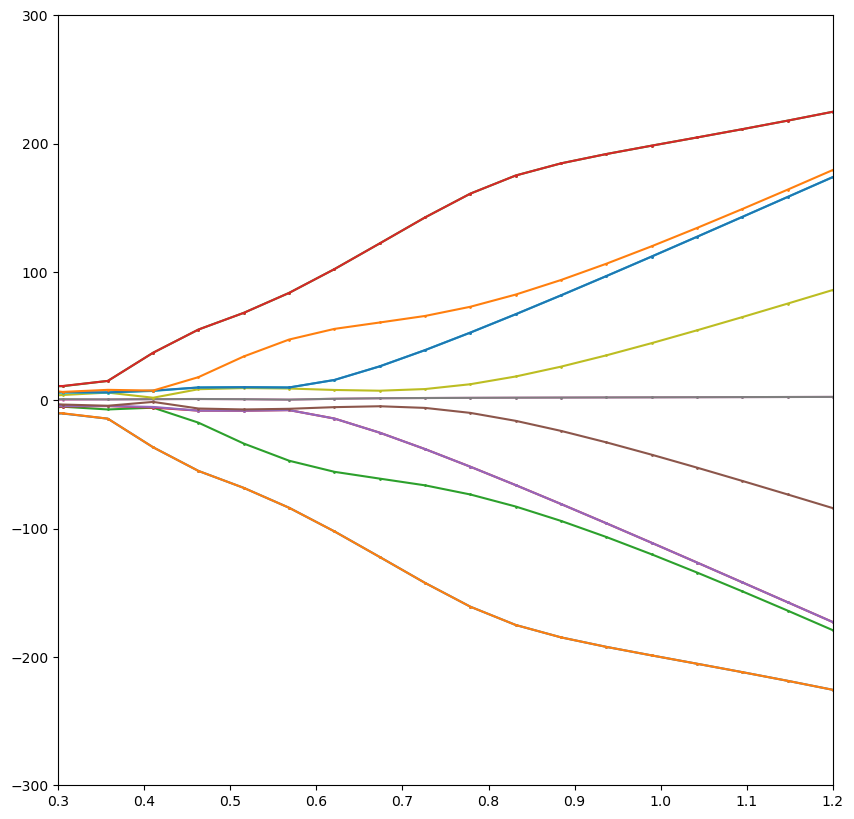

In [14]:
theta_deg_arr = np.linspace(0.2, 1.2, 20)
num_eigvalues = 14
spectrum = np.zeros((len(theta_deg_arr), num_eigvalues))

for i in range(len(theta_deg_arr)):
    theta_deg = theta_deg_arr[i]
    theta_rad = theta_deg/180 * np.pi
    tbg = t.BMCM(theta_rad, k_cutoff=8)
    H = tbg.Hamiltonian((0,0))
    # Diagonalize the sparse matrix
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    # Choose the middle eigenvalues
    mid_index = len(eigenvalues) // 2
    half_range = num_eigvalues//2
    eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
    eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
    
    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    spectrum[i,:] = eigenvalues
    print(f"finishing {i} of {len(theta_deg_arr)}") 
    
clear_output(wait=True)


plt.figure(figsize=(10,10))
plt.xlim(0.3, 1.2)
plt.ylim(-300, 300)
for i in range(len(spectrum[0])):
    # if i+1 in filter_indices: continue
    plt.plot(theta_deg_arr, spectrum[:,i], '-o', ms=1, label=f"Eigenvalue {i+1}")
# plt.legend()
plt.show()

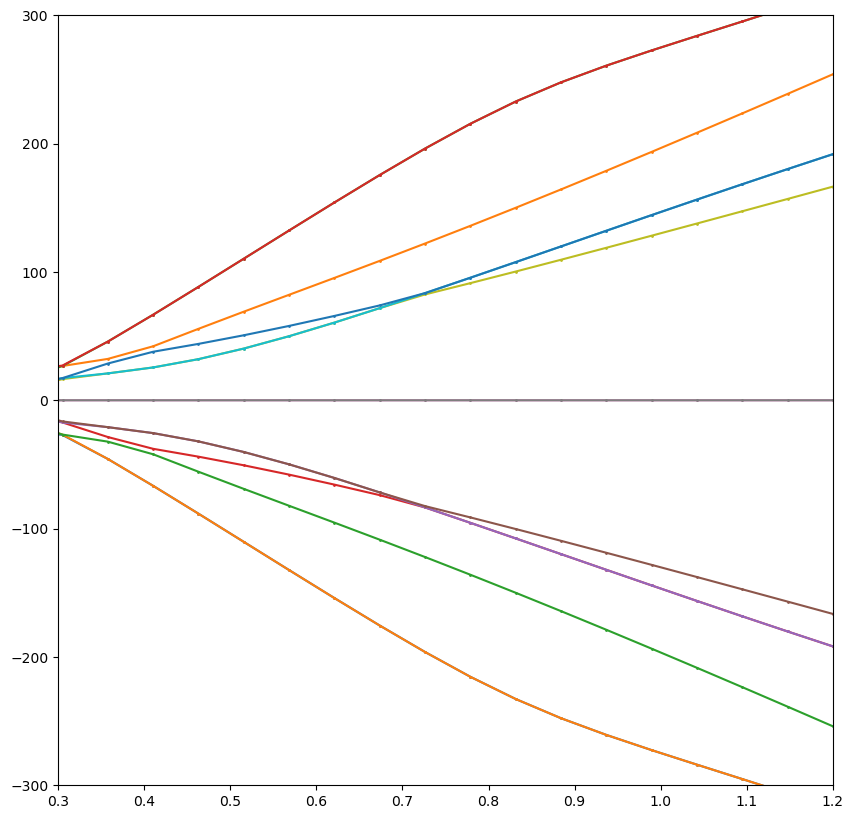

In [15]:
theta_deg_arr = np.linspace(0.2, 1.2, 20)
num_eigvalues = 14
spectrum = np.zeros((len(theta_deg_arr), num_eigvalues))

for i in range(len(theta_deg_arr)):
    theta_deg = theta_deg_arr[i]
    theta_rad = theta_deg/180 * np.pi
    tbg = t.CSCM(theta_rad, k_cutoff=8)
    H = tbg.Hamiltonian((0,0))
    # Diagonalize the sparse matrix
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    # Choose the middle eigenvalues
    mid_index = len(eigenvalues) // 2
    half_range = num_eigvalues//2
    eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
    eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
    
    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    spectrum[i,:] = eigenvalues
    print(f"finishing {i} of {len(theta_deg_arr)}") 
    
clear_output(wait=True)


plt.figure(figsize=(10,10))
plt.xlim(0.3, 1.2)
plt.ylim(-300, 300)
for i in range(len(spectrum[0])):
    # if i+1 in filter_indices: continue
    plt.plot(theta_deg_arr, spectrum[:,i], '-o', ms=1, label=f"Eigenvalue {i+1}")
# plt.legend()
plt.show()

alpha = 0.606, theta = 1.062 (deg)
alpha = 1.270, theta = 0.507 (deg)
alpha = 1.820, theta = 0.354 (deg)
alpha = 2.650, theta = 0.243 (deg)
alpha = 3.180, theta = 0.202 (deg)
alpha = 0.570, theta = 1.129 (deg)


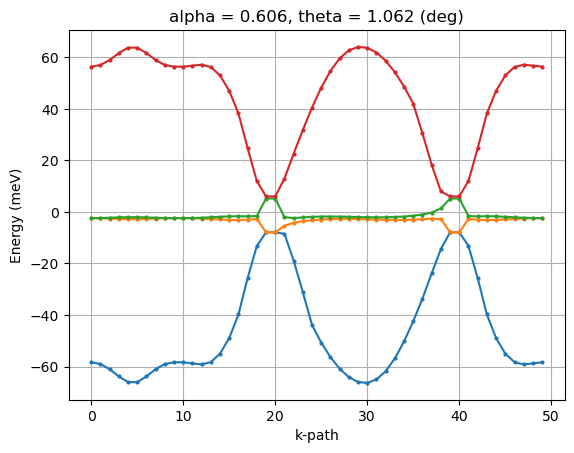

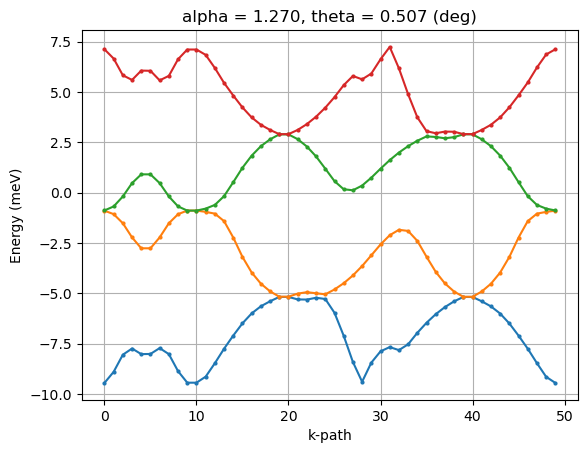

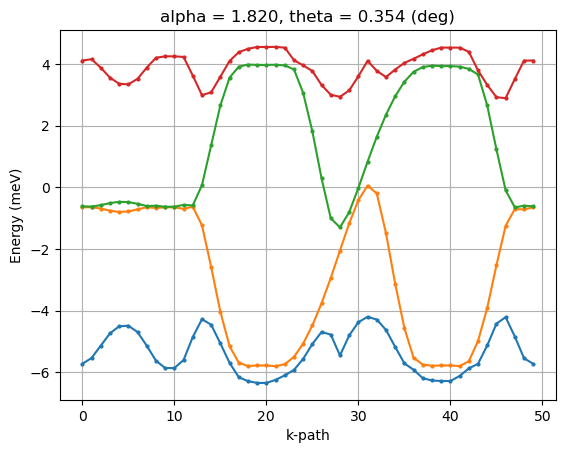

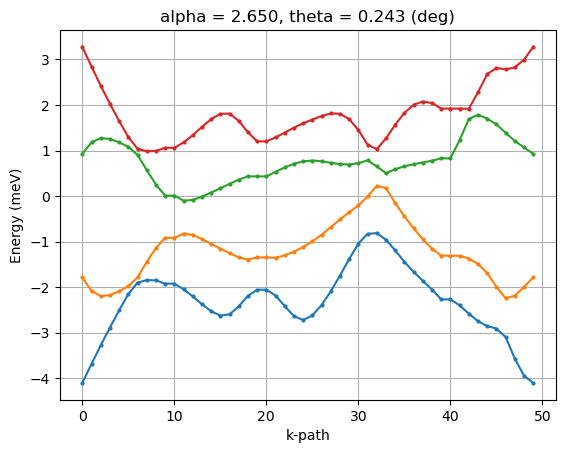

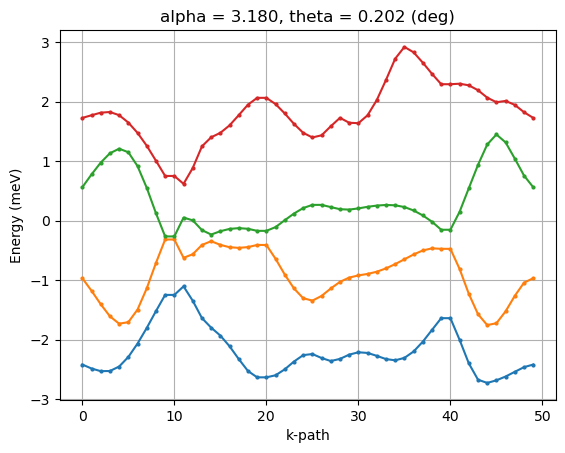

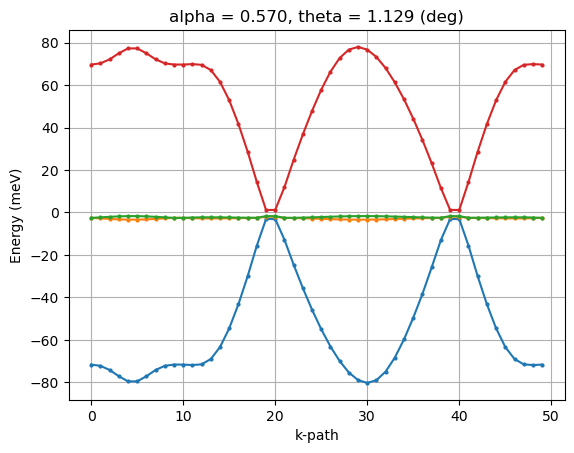

In [40]:
# spectrum = np.zeros((len(t.kpath_x), 8))
alpha_arr = np.array([0.606, 1.27, 1.82, 2.65, 3.18, 0.570]) # BM values
# alpha_arr = np.array([0.586, 2.221, 3.751, 5.276, 6.795]) # CSCM values

prop_const = t.omega_1/t.v_F_hbar/2/t.k_D
# print(prop_const)

num_eigvalues = 4
# spectrum = np.zeros((len(t.kpath_x), num_eigvalues))
spectrum = np.zeros((len(alpha_arr), len(t.kpath_x), num_eigvalues))

theta_rad_arr = 2*np.arcsin(prop_const/alpha_arr) 
# print(np.rad2deg(theta_rad_arr))

kpath_x = t.kpath_x
kpath_y = t.kpath_y
index = np.arange(len(alpha_arr))

for theta_rad, alpha, ind in zip(theta_rad_arr, alpha_arr, index):
    print(f"alpha = {alpha :.3f}, theta = {np.rad2deg(theta_rad) :.3f} (deg)")
    tbg = t.BM_original(theta_rad, k_cutoff=8)

    for i in range(len(t.kpath_x)):
        H = tbg.Hamiltonian((kpath_x[i], kpath_y[i]))
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        # Choose the middle eigenvalues
        mid_index = len(eigenvalues) // 2
        half_range = num_eigvalues//2
        eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
        eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
        
        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        spectrum[ind,i,:] = eigenvalues
        # print(f"finishing {i} of {len(t.kpath_x)}") 

    plt.figure()
    plt.title(f"alpha = {alpha :.3f}, theta = {np.rad2deg(theta_rad) :.3f} (deg)")
    plt.grid()
    plt.ylabel('Energy (meV)')
    plt.xlabel('k-path')
    for i in range(num_eigvalues):
        plt.plot(np.arange(len(t.kpath_x)), spectrum[ind,:,i], '-o', ms=2)
    

In [33]:
num_eigvalues = 4
alpha_arr = np.concatenate((np.linspace(0.1, 5, 100), np.linspace(0.568,0.572,20)))
alpha_arr = np.sort(alpha_arr)
bandwidth = np.zeros(len(alpha_arr))
bandwidth2 = np.zeros(len(alpha_arr))
spectrum = np.zeros((len(alpha_arr), len(t.kpath_x), num_eigvalues))
theta_rad_arr = 2*np.arcsin(prop_const/alpha_arr) 
for j, theta_rad, alpha in zip(range(len(alpha_arr)), theta_rad_arr, alpha_arr):
    print(f"{j}: alpha = {alpha :.3f}, theta = {np.rad2deg(theta_rad) :.3f} (deg)")
    if j % 10 == 0: clear_output(wait=True)
    tbg = t.BM_original(theta_rad, k_cutoff=8)
    for i in range(len(t.kpath_x)):
        H = tbg.Hamiltonian((t.kpath_x[i], t.kpath_y[i]))
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        # Choose the middle eigenvalues
        mid_index = len(eigenvalues) // 2
        half_range = num_eigvalues//2
        eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
        eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
        
        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        spectrum[j,i,:] = eigenvalues
        # print(f"finishing {i} of {len(t.kpath_x)}") 

        bandwidth[j] = (np.max(spectrum[j,:,1])-np.min(spectrum[j,:,1]))
        bandwidth2[j] = (np.max(spectrum[j,:,2])-np.min(spectrum[j,:,2]))
np.save("BM_original_vary_arr_spectrum.npy", spectrum)

111: alpha = 4.604, theta = 0.140 (deg)
112: alpha = 4.654, theta = 0.138 (deg)
113: alpha = 4.703, theta = 0.137 (deg)
114: alpha = 4.753, theta = 0.135 (deg)
115: alpha = 4.802, theta = 0.134 (deg)
116: alpha = 4.852, theta = 0.133 (deg)
117: alpha = 4.901, theta = 0.131 (deg)
118: alpha = 4.951, theta = 0.130 (deg)
119: alpha = 5.000, theta = 0.129 (deg)


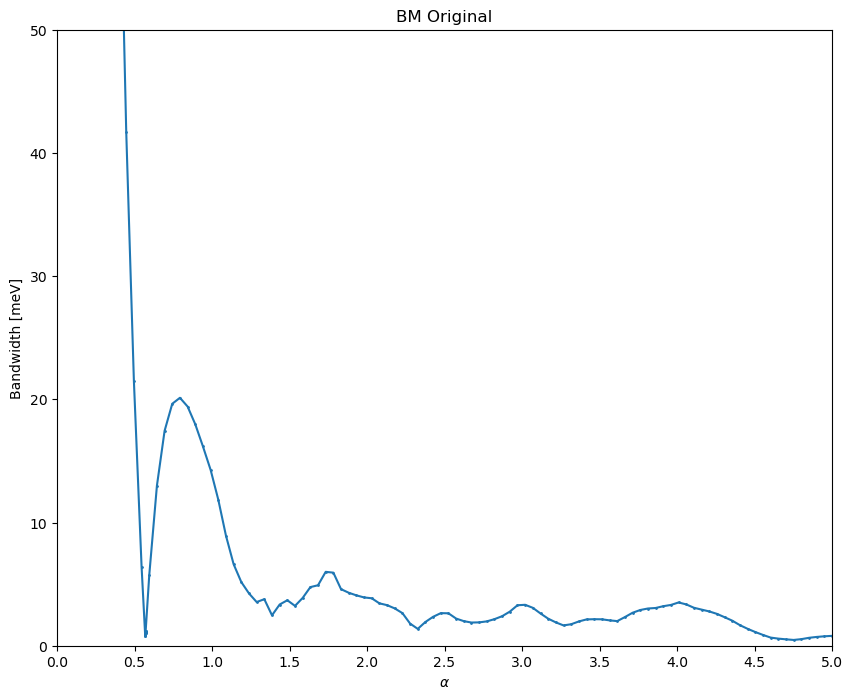

In [37]:
# alpha_arr = np.concatenate(np.linspace(0.1, 5, 100), np.linspace(0.568,0.572,20))
# alpha_arr = np.sort(alpha_arr)
spectrum = np.load("BM_original_vary_arr_spectrum.npy")
bandwidth = np.zeros(len(alpha_arr))
bandwidth2 = np.zeros(len(alpha_arr))
for j in range(len(alpha_arr)):
     bandwidth[j] = (np.max(spectrum[j,:,1])-np.min(spectrum[j,:,1]))
     bandwidth2[j] = (np.max(spectrum[j,:,2])-np.min(spectrum[j,:,2]))

plt.figure(figsize=(10,8))
plt.plot(alpha_arr, bandwidth2, '-o', ms=1)
plt.xlabel(r"$\alpha$")
plt.xticks(np.arange(0, 5.1, 0.5))
plt.xlim(0, 5)
plt.ylabel("Bandwidth [meV]")
# for a in np.array([0.606, 1.27, 1.82, 2.65, 3.18]) :
#     plt.axvline(a, color='k', linestyle='--', alpha=0.5)
#     ...
plt.title("BM Original")
plt.ylim(0, 50)
plt.legend
plt.show()

In [86]:
# First magic angle
alpha_arr = np.linspace(0.568,0.572,20) # BM values
bandwidth = np.zeros(len(alpha_arr))
bandwidth2 = np.zeros(len(alpha_arr))
spectrum = np.zeros((len(alpha_arr), len(t.kpath_x), num_eigvalues))
theta_rad_arr = 2*np.arcsin(prop_const/alpha_arr) 
for j, theta_rad, alpha in zip(range(len(alpha_arr)), theta_rad_arr, alpha_arr):
    print(f"{j}: alpha = {alpha :.3f}, theta = {np.rad2deg(theta_rad) :.3f} (deg)")
    if j % 10 == 0: clear_output(wait=True)
    tbg = t.BM_original(theta_rad, k_cutoff=8)
    for i in range(len(t.kpath_x)):
        H = tbg.Hamiltonian((kpath_x[i], kpath_y[i]))
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        # Choose the middle eigenvalues
        mid_index = len(eigenvalues) // 2
        half_range = num_eigvalues//2
        eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
        eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
        
        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        spectrum[j,i,:] = eigenvalues
        # print(f"finishing {i} of {len(t.kpath_x)}") 

        bandwidth[j] = (np.max(spectrum[j,:,1])-np.min(spectrum[j,:,1]))
        bandwidth2[j] = (np.max(spectrum[j,:,2])-np.min(spectrum[j,:,2]))
np.save("BM_original_first_MA_spectrum.npy", spectrum)

11: alpha = 0.570, theta = 1.128 (deg)
12: alpha = 0.571, theta = 1.128 (deg)
13: alpha = 0.571, theta = 1.127 (deg)
14: alpha = 0.571, theta = 1.127 (deg)
15: alpha = 0.571, theta = 1.127 (deg)
16: alpha = 0.571, theta = 1.126 (deg)
17: alpha = 0.572, theta = 1.126 (deg)
18: alpha = 0.572, theta = 1.125 (deg)
19: alpha = 0.572, theta = 1.125 (deg)


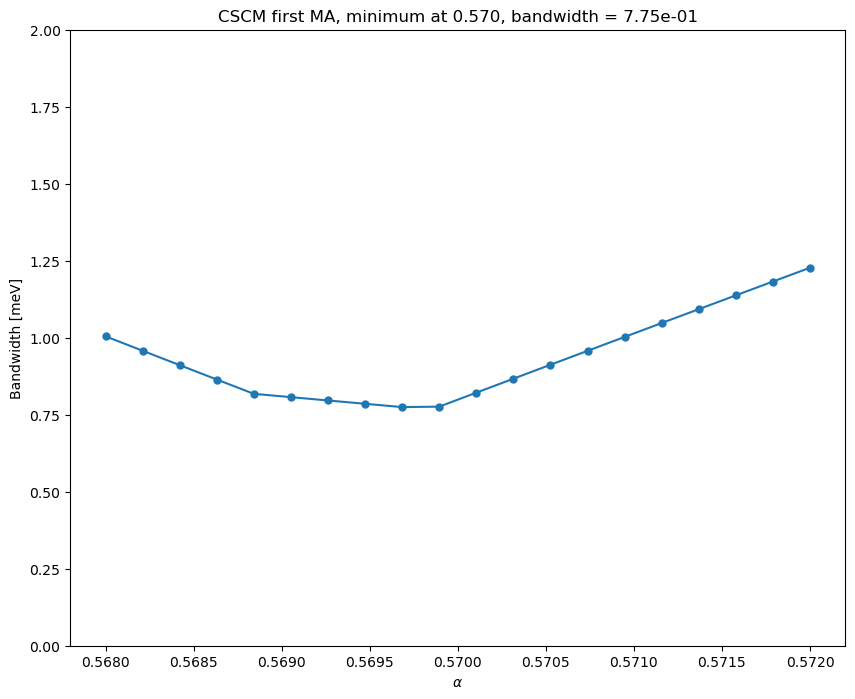

In [91]:
alpha_arr = np.linspace(0.568,0.572,20) # BM values
spectrum = np.load("BM_original_first_MA_spectrum.npy")
bandwidth2 = np.zeros(len(alpha_arr))
for j in range(len(alpha_arr)):
    bandwidth[j] = (np.max(spectrum[j,:,1])-np.min(spectrum[j,:,1]))
    bandwidth2[j] = (np.max(spectrum[j,:,2])-np.min(spectrum[j,:,2]))   
minima = argrelextrema(bandwidth2, np.less)[0][0]
plt.figure(figsize=(10,8))
plt.plot(alpha_arr, bandwidth2, '-o', ms=5)
plt.xlabel(r"$\alpha$")
plt.ylabel("Bandwidth [meV]")
plt.ylim(0, 2)
plt.title(f"CSCM first MA, minimum at {alpha_arr[minima]:.3f}, bandwidth = {bandwidth2[minima]:.2e}")
plt.legend
plt.show()

alpha = 0.586, theta = 1.098 (deg)
alpha = 2.221, theta = 0.290 (deg)
alpha = 3.751, theta = 0.172 (deg)
alpha = 5.276, theta = 0.122 (deg)
alpha = 6.795, theta = 0.095 (deg)


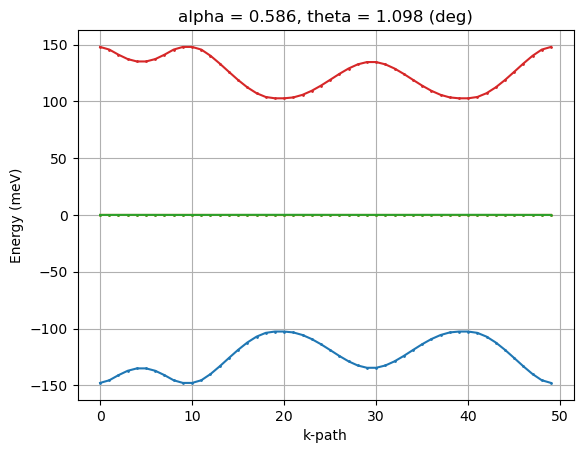

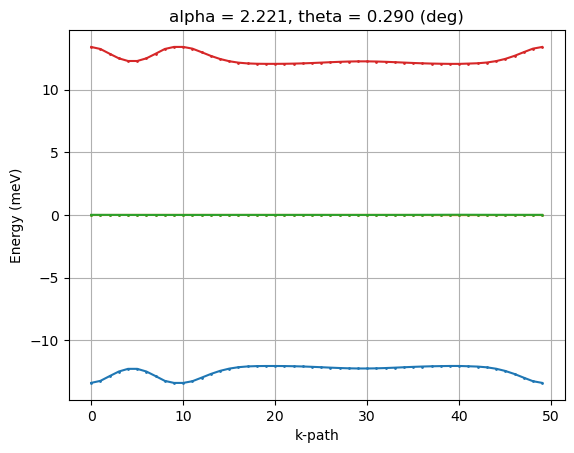

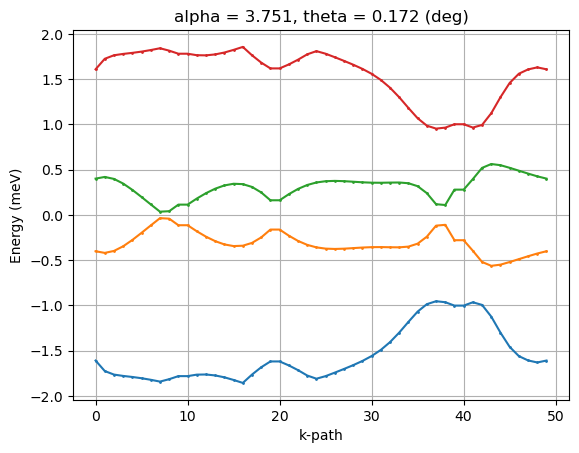

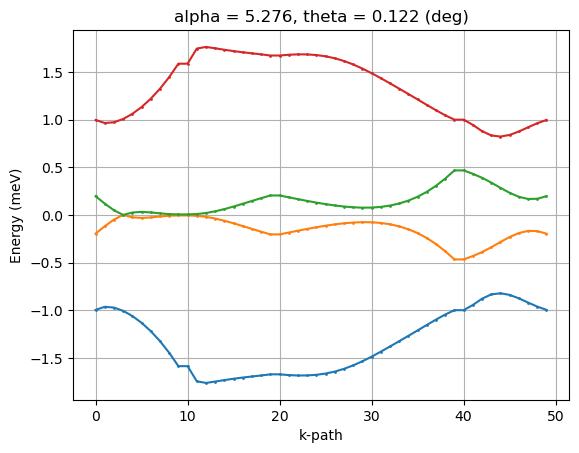

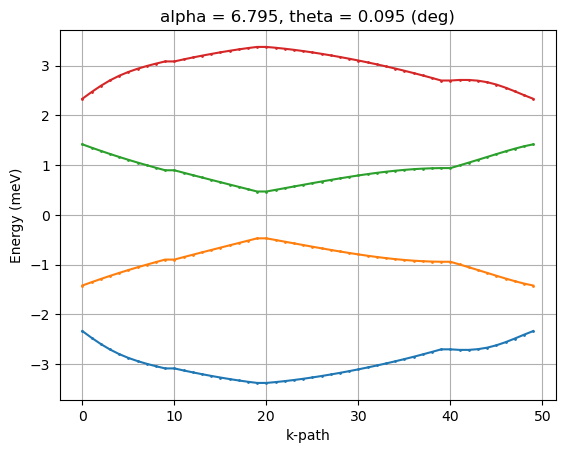

In [41]:
# Chiral Limit
# spectrum = np.zeros((len(t.kpath_x), 8))
# alpha_arr = np.array([0.606, 1.27, 1.82, 2.65, 3.18]) # BM values
alpha_arr = np.array([0.586, 2.221, 3.751, 5.276, 6.795]) # CSCM values

prop_const = t.omega_1/t.v_F_hbar/2/t.k_D
# print(prop_const)

num_eigvalues = 4
# spectrum = np.zeros((len(t.kpath_x), num_eigvalues))
spectrum = np.zeros((len(alpha_arr), len(t.kpath_x), num_eigvalues))

theta_rad_arr = 2*np.arcsin(prop_const/alpha_arr) 
# print(np.rad2deg(theta_rad_arr))

kpath_x = t.kpath_x
kpath_y = t.kpath_y
index = np.arange(len(alpha_arr))

for theta_rad, alpha, ind in zip(theta_rad_arr, alpha_arr, index):
    print(f"alpha = {alpha :.3f}, theta = {np.rad2deg(theta_rad) :.3f} (deg)")
    tbg = t.CSCM(theta_rad, k_cutoff=8)

    for i in range(len(t.kpath_x)):
        H = tbg.Hamiltonian((kpath_x[i], kpath_y[i]))
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        # Choose the middle eigenvalues
        mid_index = len(eigenvalues) // 2
        half_range = num_eigvalues//2
        eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
        eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
        
        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        spectrum[ind,i,:] = eigenvalues
        # print(f"finishing {i} of {len(t.kpath_x)}") 

    plt.figure()
    plt.grid()
    plt.xlabel("k-path")
    plt.ylabel('Energy (meV)')
    plt.title(f"alpha = {alpha :.3f}, theta = {np.rad2deg(theta_rad) :.3f} (deg)")
    for i in range(num_eigvalues):
        plt.plot(np.arange(len(t.kpath_x)), spectrum[ind,:,i], '-o', ms=1)

alpha = 0.586, theta = 1.098 (deg)
alpha = 2.221, theta = 0.290 (deg)


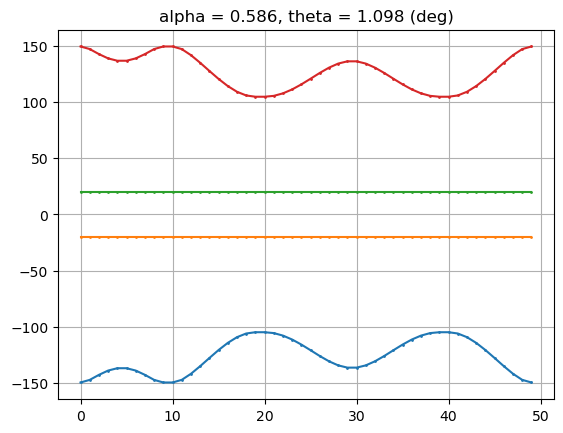

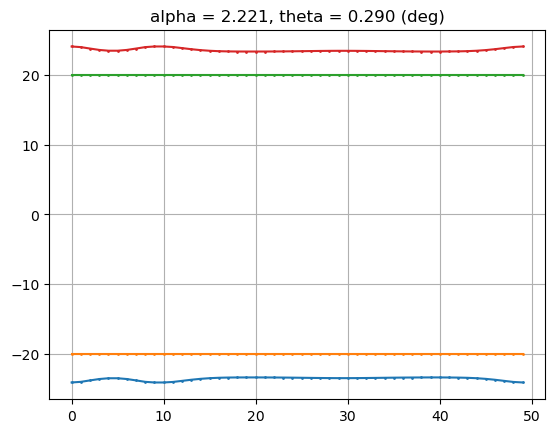

In [42]:
alpha_arr = np.array([0.586, 2.221]) # CSCM values

prop_const = t.omega_1/t.v_F_hbar/2/t.k_D
# print(prop_const)

num_eigvalues = 4
# spectrum = np.zeros((len(t.kpath_x), num_eigvalues))
spectrum = np.zeros((len(alpha_arr), len(t.kpath_x), num_eigvalues))

theta_rad_arr = 2*np.arcsin(prop_const/alpha_arr) 
# print(np.rad2deg(theta_rad_arr))

kpath_x = t.kpath_x
kpath_y = t.kpath_y
index = np.arange(len(alpha_arr))

for theta_rad, alpha, ind in zip(theta_rad_arr, alpha_arr, index):
    print(f"alpha = {alpha :.3f}, theta = {np.rad2deg(theta_rad) :.3f} (deg)")
    tbg = t.CSCM(theta_rad, k_cutoff=8, sublattice_potential=20)

    for i in range(len(t.kpath_x)):
        H = tbg.Hamiltonian((kpath_x[i], kpath_y[i]))
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        # Choose the middle eigenvalues
        mid_index = len(eigenvalues) // 2
        half_range = num_eigvalues//2
        eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
        eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
        
        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        spectrum[ind,i,:] = eigenvalues
        # print(f"finishing {i} of {len(t.kpath_x)}") 

    plt.figure()
    plt.grid()
    plt.title(f"alpha = {alpha :.3f}, theta = {np.rad2deg(theta_rad) :.3f} (deg)")
    for i in range(num_eigvalues):
        plt.plot(np.arange(len(t.kpath_x)), spectrum[ind,:,i], '-o', ms=1)

In [43]:
num_eigvalues = 4
alpha_arr = np.concatenate((np.linspace(0.1, 5, 100), np.linspace(0.5855,0.575,20)))
alpha_arr = np.sort(alpha_arr)
bandwidth = np.zeros(len(alpha_arr))
bandwidth2 = np.zeros(len(alpha_arr))
spectrum = np.zeros((len(alpha_arr), len(t.kpath_x), num_eigvalues))
theta_rad_arr = 2*np.arcsin(prop_const/alpha_arr) 
for j, theta_rad, alpha in zip(range(len(alpha_arr)), theta_rad_arr, alpha_arr):
    print(f"{j}: alpha = {alpha :.3f}, theta = {np.rad2deg(theta_rad) :.3f} (deg)")
    if j % 10 == 0: clear_output(wait=True)
    tbg = t.CSCM(theta_rad, k_cutoff=8)
    for i in range(len(t.kpath_x)):
        H = tbg.Hamiltonian((kpath_x[i], kpath_y[i]))
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        # Choose the middle eigenvalues
        mid_index = len(eigenvalues) // 2
        half_range = num_eigvalues//2
        eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
        eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
        
        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        spectrum[j,i,:] = eigenvalues
        # print(f"finishing {i} of {len(t.kpath_x)}") 

        bandwidth[j] = (np.max(spectrum[j,:,1])-np.min(spectrum[j,:,1]))
        bandwidth2[j] = (np.max(spectrum[j,:,2])-np.min(spectrum[j,:,2]))
np.save("CSCM_vary_arr_spectrum.npy", spectrum)

111: alpha = 4.604, theta = 0.140 (deg)
112: alpha = 4.654, theta = 0.138 (deg)
113: alpha = 4.703, theta = 0.137 (deg)
114: alpha = 4.753, theta = 0.135 (deg)
115: alpha = 4.802, theta = 0.134 (deg)
116: alpha = 4.852, theta = 0.133 (deg)
117: alpha = 4.901, theta = 0.131 (deg)
118: alpha = 4.951, theta = 0.130 (deg)
119: alpha = 5.000, theta = 0.129 (deg)


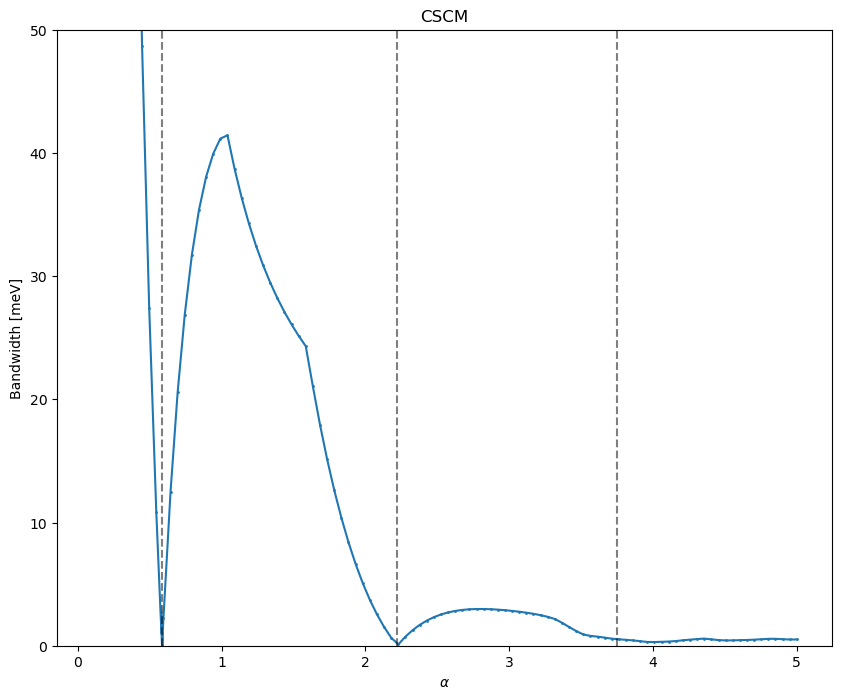

In [45]:
# alpha_arr = np.linspace(0.1, 5, 100)
spectrum = np.load("CSCM_vary_arr_spectrum.npy")

bandwidth = np.zeros(len(alpha_arr))
bandwidth2 = np.zeros(len(alpha_arr))
for j in range(len(alpha_arr)):
     bandwidth[j] = (np.max(spectrum[j,:,1])-np.min(spectrum[j,:,1]))
     bandwidth2[j] = (np.max(spectrum[j,:,2])-np.min(spectrum[j,:,2]))

plt.figure(figsize=(10,8))
plt.plot(alpha_arr, bandwidth2, '-o', ms=1)
plt.xlabel(r"$\alpha$")
plt.ylabel("Bandwidth [meV]")

for a in np.array([0.586, 2.221, 3.751]) :
    plt.axvline(a, color='k', linestyle='--', alpha=0.5)
    ...
plt.title("CSCM")
plt.ylim(0, 50)
plt.savefig('output_CSCM_bandwidth.png')

In [ ]:
# First Magic Angle
alpha_arr = np.linspace(0.585,0.587, 100) # BM values
bandwidth = np.zeros(len(alpha_arr))
bandwidth2 = np.zeros(len(alpha_arr))
spectrum = np.zeros((len(alpha_arr), len(t.kpath_x), num_eigvalues))
theta_rad_arr = 2*np.arcsin(prop_const/alpha_arr) 
for j, theta_rad, alpha in zip(range(len(alpha_arr)), theta_rad_arr, alpha_arr):
    print(f"{j}: alpha = {alpha :.3f}, theta = {np.rad2deg(theta_rad) :.3f} (deg)")
    if j % 10 == 0: clear_output(wait=True)
    tbg = t.CSCM(theta_rad, k_cutoff=8)
    for i in range(len(t.kpath_x)):
        H = tbg.Hamiltonian((kpath_x[i], kpath_y[i]))
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        # Choose the middle eigenvalues
        mid_index = len(eigenvalues) // 2
        half_range = num_eigvalues//2
        eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
        eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
        
        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        spectrum[j,i,:] = eigenvalues
        # print(f"finishing {i} of {len(t.kpath_x)}") 

        bandwidth[j] = (np.max(spectrum[j,:,1])-np.min(spectrum[j,:,1]))
        bandwidth2[j] = (np.max(spectrum[j,:,2])-np.min(spectrum[j,:,2]))
np.save("CSCM_first_MA_k_cutoff_spectrum.npy", spectrum)

91: alpha = 0.587, theta = 1.097 (deg)
92: alpha = 0.587, theta = 1.096 (deg)
93: alpha = 0.587, theta = 1.096 (deg)
94: alpha = 0.587, theta = 1.096 (deg)
95: alpha = 0.587, theta = 1.096 (deg)
96: alpha = 0.587, theta = 1.096 (deg)
97: alpha = 0.587, theta = 1.096 (deg)
98: alpha = 0.587, theta = 1.096 (deg)
99: alpha = 0.587, theta = 1.096 (deg)


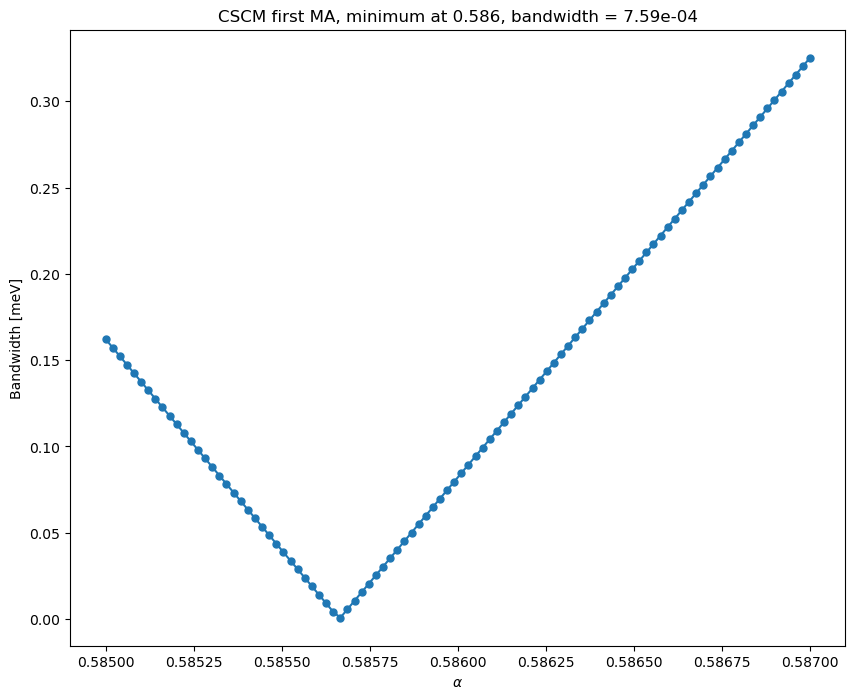

In [40]:
minima = argrelextrema(bandwidth2, np.less)[0][0]
plt.figure(figsize=(10,8))
plt.plot(alpha_arr, bandwidth2, '-o', ms=5)
plt.xlabel(r"$\alpha$")
plt.ylabel("Bandwidth [meV]")
plt.title(f"CSCM first MA, minimum at {alpha_arr[minima]:.3f}, bandwidth = {bandwidth2[minima]:.2e}")
# plt.ylim(0, 2)
plt.legend
plt.show()

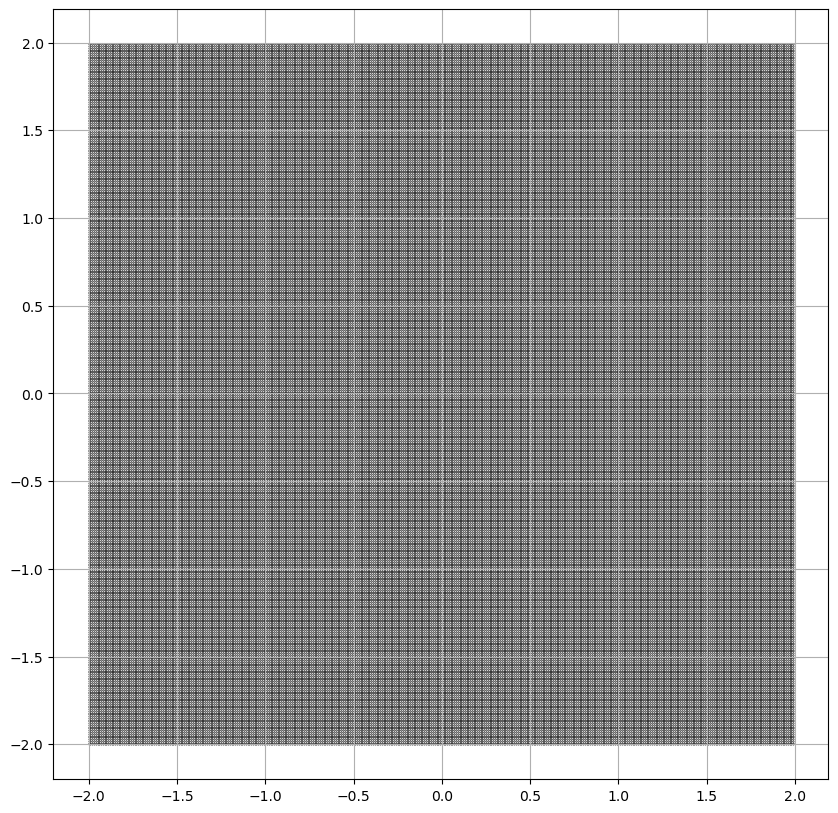

In [46]:
# Diagonalize over Brillouin zone
N = 400
axis = [-N//2, N//2-1]
coord_list = t.generate_pairs_numpy(axis, axis)/(N//4)
MA_alpha = 1.757/3
prop_const = t.omega_1/t.v_F_hbar/2/t.k_D
theta_rad_MA = 2*np.arcsin(prop_const/MA_alpha)
theta_deg = np.rad2deg(theta_rad_MA)
num_eigvalues = 2
plt.figure(figsize=(10,10))
# plt.xlim(-0.5, 0.5)
# plt.ylim(-0.5, 0.5)
plt.grid()
plt.scatter(coord_list[:,0], coord_list[:,1], s=0.1, c='k')


In [27]:
tbg = t.CSCM(theta_rad_MA, k_cutoff=8, sublattice_potential=20)
H = tbg.Hamiltonian((0,0))
spectrum_bz = np.zeros((N, N, num_eigvalues))
eigenvectors_bz = np.zeros((N, N, 2*len(tbg.k_set), num_eigvalues), dtype=complex)
for i in range(N):
    for j in range(N):
            k = coord_list[i*N+j]
            # print(k)
            H = tbg.Hamiltonian(k)
            eigenvalues, eigenvectors = np.linalg.eigh(H)
            # Choose the middle eigenvalues
            mid_index = len(eigenvalues) // 2
            half_range = num_eigvalues//2
            eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
            eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
            
            # Sort eigenvalues and eigenvectors
            sorted_indices = np.argsort(eigenvalues)
            eigenvalues = eigenvalues[sorted_indices]
            eigenvectors = eigenvectors[:, sorted_indices]
            spectrum_bz[i,j,:] = eigenvalues
            eigenvectors_bz[i,j,:,:] = eigenvectors
    
    print(f"finishing {i} of {N}")
    if (i+1) % 10 == 0: clear_output(wait=True)
    
filename = f"magic_angle_BZ/CSCM_BZ_{N}_by_{N}_"
np.save(filename + "spectrum.npy", spectrum_bz) 
np.save(filename + "eigenvector.npy", eigenvectors_bz)

finishing 390 of 400
finishing 391 of 400
finishing 392 of 400
finishing 393 of 400
finishing 394 of 400
finishing 395 of 400
finishing 396 of 400
finishing 397 of 400
finishing 398 of 400
finishing 399 of 400
